# Assignment 1: Data Analytics (18-899) - Carnegie Mellon University

In [1]:
#Importing useful libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

### Question 1

In [2]:
# loading the historical daily weather data for France2
weather = pd.read_csv("Paris_weather_data_2017.csv", encoding= 'unicode_escape')
weather.head()

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),...,avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),high Gust Wind (km/h),sum Precip. (mm),Events
0,1/1/2017,0,-3,-5,-1,-3,-6,100,94,86,...,1023,1020,7.0,3.0,0.0,10,6,-,0,Fog
1,1/2/2017,2,0,-2,1,1,-1,100,95,88,...,1025,1022,14.0,4.0,0.0,16,6,-,2,"Fog , Rain , Snow"
2,1/3/2017,1,0,-1,1,0,-1,100,95,88,...,1030,1028,7.0,2.0,0.0,14,6,-,0,Fog
3,1/4/2017,6,2,-1,4,1,-1,100,87,71,...,1025,1023,19.0,9.0,3.0,23,14,-,2,Rain
4,1/5/2017,7,3,1,2,0,-2,93,79,59,...,1032,1027,19.0,12.0,10.0,14,11,-,0,NaN


In [3]:
weather.columns

Index(['Date', 'high Temp. (°C)', 'avg Temp. (°C)', 'low Temp. (°C)',
       'high Dew Point (°C)', 'avg Dew Point (°C)', 'low Dew Point (°C)',
       'high Humidity (%)', 'avg Humidity (%)', 'low Humidity (%)',
       'high Sea Level Press. (hPa)', 'avg Sea Level Press. (hPa)',
       'low Sea Level Press. (hPa)', 'high Visibility (km)',
       'avg Visibility (km)', 'low Visibility (km)', 'high Wind (km/h)',
       'avg Wind (km/h)', 'high Gust Wind (km/h)', 'sum Precip. (mm)',
       'Events'],
      dtype='object')

In [4]:
#Renaming the columns
weather.columns = ['date', 'high_temp', 'avg_temp', 'low_temp', 'high_dew_point', 'avg_dew_point', 'low_dew_point',
                   'high_humidity', 'avg_humidity', 'low_humidity', 'high_sea_level', 'avg_sea_level', 'low_sea_level', 
                   'high_visibility','avg_visibility', 'low_visibility', 'high_wind', 'avg_wind', 'high_gust_wind', 
                   'sum_precip', 'events']

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             365 non-null    object 
 1   high_temp        365 non-null    int64  
 2   avg_temp         365 non-null    int64  
 3   low_temp         365 non-null    int64  
 4   high_dew_point   365 non-null    int64  
 5   avg_dew_point    365 non-null    int64  
 6   low_dew_point    365 non-null    int64  
 7   high_humidity    365 non-null    int64  
 8   avg_humidity     365 non-null    int64  
 9   low_humidity     365 non-null    int64  
 10  high_sea_level   365 non-null    int64  
 11  avg_sea_level    365 non-null    int64  
 12  low_sea_level    365 non-null    int64  
 13  high_visibility  363 non-null    float64
 14  avg_visibility   363 non-null    float64
 15  low_visibility   363 non-null    float64
 16  high_wind        365 non-null    int64  
 17  avg_wind        

In [6]:
weather.drop(columns = ["high_gust_wind", "events"], inplace = True)

In [7]:
weather

,date,high_temp,avg_temp,low_temp,high_dew_point,avg_dew_point,low_dew_point,high_humidity,avg_humidity,low_humidity,high_sea_level,avg_sea_level,low_sea_level,high_visibility,avg_visibility,low_visibility,high_wind,avg_wind,sum_precip
0,1/1/2017,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,1/2/2017,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,1/3/2017,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,1/4/2017,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,1/5/2017,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2017,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
361,12/28/2017,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
362,12/29/2017,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12
363,12/30/2017,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3


In [8]:
#filling in missing alues with linear interpolation
weather = weather.interpolate()

In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             365 non-null    object 
 1   high_temp        365 non-null    int64  
 2   avg_temp         365 non-null    int64  
 3   low_temp         365 non-null    int64  
 4   high_dew_point   365 non-null    int64  
 5   avg_dew_point    365 non-null    int64  
 6   low_dew_point    365 non-null    int64  
 7   high_humidity    365 non-null    int64  
 8   avg_humidity     365 non-null    int64  
 9   low_humidity     365 non-null    int64  
 10  high_sea_level   365 non-null    int64  
 11  avg_sea_level    365 non-null    int64  
 12  low_sea_level    365 non-null    int64  
 13  high_visibility  365 non-null    float64
 14  avg_visibility   365 non-null    float64
 15  low_visibility   365 non-null    float64
 16  high_wind        365 non-null    int64  
 17  avg_wind        

In [10]:
weather.date = pd.to_datetime(weather.date, infer_datetime_format = True)

In [11]:
weather.dtypes

date               datetime64[ns]
high_temp                   int64
avg_temp                    int64
low_temp                    int64
high_dew_point              int64
avg_dew_point               int64
low_dew_point               int64
high_humidity               int64
avg_humidity                int64
low_humidity                int64
high_sea_level              int64
avg_sea_level               int64
low_sea_level               int64
high_visibility           float64
avg_visibility            float64
low_visibility            float64
high_wind                   int64
avg_wind                    int64
sum_precip                  int64
dtype: object

### Question 2

In [12]:
weather.corr()

,high_temp,avg_temp,low_temp,high_dew_point,avg_dew_point,low_dew_point,high_humidity,avg_humidity,low_humidity,high_sea_level,avg_sea_level,low_sea_level,high_visibility,avg_visibility,low_visibility,high_wind,avg_wind,sum_precip
high_temp,1.000000,0.976658,0.888110,0.856099,0.858129,0.843248,-0.394430,-0.642644,-0.653028,-0.253617,-0.150903,-0.088462,0.472632,0.583418,0.433610,-0.081673,-0.199951,-0.059089
avg_temp,0.976658,1.000000,0.962072,0.913373,0.921361,0.909771,-0.378330,-0.562269,-0.553089,-0.308957,-0.203274,-0.135283,0.470747,0.516090,0.382910,-0.020533,-0.118921,-0.009994
low_temp,0.888110,0.962072,1.000000,0.929764,0.944682,0.938312,-0.333137,-0.424648,-0.389762,-0.365482,-0.261217,-0.190036,0.440356,0.396212,0.294317,0.054929,-0.007974,0.052513
high_dew_point,0.856099,0.913373,0.929764,1.000000,0.978604,0.940691,-0.087426,-0.233558,-0.262292,-0.355841,-0.264679,-0.192708,0.423909,0.284302,0.137303,0.019975,-0.096624,0.132642
avg_dew_point,0.858129,0.921361,0.944682,0.978604,1.000000,0.979591,-0.094926,-0.214550,-0.231225,-0.329256,-0.229100,-0.158419,0.391113,0.275633,0.141021,-0.028561,-0.120984,0.108504
low_dew_point,0.843248,0.909771,0.938312,0.940691,0.979591,1.000000,-0.111733,-0.218440,-0.221393,-0.303539,-0.199631,-0.133562,0.370891,0.283601,0.157779,-0.067316,-0.138766,0.073233
high_humidity,-0.394430,-0.378330,-0.333137,-0.087426,-0.094926,-0.111733,1.000000,0.784955,0.564862,0.060913,0.018209,0.005438,-0.197160,-0.537656,-0.650603,-0.104845,-0.162285,0.216222
avg_humidity,-0.642644,-0.562269,-0.424648,-0.233558,-0.214550,-0.218440,0.784955,1.000000,0.913106,0.088453,0.034150,0.014301,-0.393915,-0.751189,-0.705064,-0.035586,0.009024,0.263498
low_humidity,-0.653028,-0.553089,-0.389762,-0.262292,-0.231225,-0.221393,0.564862,0.913106,1.000000,0.125158,0.069619,0.041238,-0.470039,-0.713792,-0.608081,-0.002123,0.081944,0.203391
high_sea_level,-0.253617,-0.308957,-0.365482,-0.355841,-0.329256,-0.303539,0.060913,0.088453,0.125158,1.000000,0.964592,0.899322,-0.420369,-0.160598,-0.091900,-0.485558,-0.371158,-0.359849


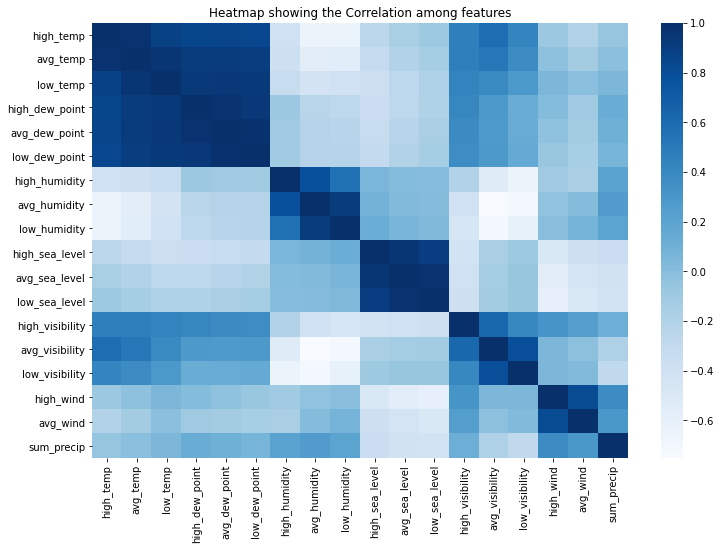

In [13]:
#creating a heatmap to visualize the corrrelation between features
plt.figure(figsize = (12, 8))
sns.heatmap(weather.corr(), cmap = "Blues")
plt.title("Heatmap showing the Correlation among features")
plt.show()

### Question 3

In [14]:
#loading the historical daily electricity consumption data for France
electricity = pd.read_csv("Historique_consommation_JOUR_2017.csv", skiprows = 7)
electricity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Date,Type de données,Energie journalière (MWh)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,01/01/2017,Définitives,1652084.0
2,NaN,NaN,NaN,02/01/2017,Définitives,1768332.0
3,NaN,NaN,NaN,03/01/2017,Définitives,1886120.0
4,NaN,NaN,NaN,04/01/2017,Définitives,1923775.0


In [15]:
#Drop columns with NaN values
electricity.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], axis = 1, inplace = True)

In [16]:
electricity.head()

,Date,Type de données,Energie journalière (MWh)
0,NaN,NaN,NaN
1,01/01/2017,Définitives,1652084.0
2,02/01/2017,Définitives,1768332.0
3,03/01/2017,Définitives,1886120.0
4,04/01/2017,Définitives,1923775.0


In [17]:
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       365 non-null    object 
 1   Type de données            365 non-null    object 
 2   Energie journalière (MWh)  365 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.0+ KB


In [18]:
#Drop rows with NaN values
electricity.dropna(inplace = True)

In [19]:
electricity = electricity.reset_index(drop = True)

In [20]:
#Giving the columns more descriptive names
electricity.columns = ["date", "data_type", "daily_energy"]

In [21]:
electricity

,date,data_type,daily_energy
0,01/01/2017,Définitives,1652084.0
1,02/01/2017,Définitives,1768332.0
2,03/01/2017,Définitives,1886120.0
3,04/01/2017,Définitives,1923775.0
4,05/01/2017,Définitives,1887470.0
...,...,...,...
360,27/12/2017,Définitives,1582970.0
361,28/12/2017,Définitives,1664743.0
362,29/12/2017,Définitives,1668623.0
363,30/12/2017,Définitives,1437082.0


In [22]:
electricity["date"] = pd.to_datetime(electricity["date"], dayfirst = True)

In [23]:
electricity["date"]

0     2017-01-01
1     2017-01-02
2     2017-01-03
3     2017-01-04
4     2017-01-05
         ...    
360   2017-12-27
361   2017-12-28
362   2017-12-29
363   2017-12-30
364   2017-12-31
Name: date, Length: 365, dtype: datetime64[ns]

### Question 4

In [24]:
# Synchronizing the two dataset
weather.set_index('date', inplace = True)
electricity.set_index('date', inplace = True)
france = electricity.merge(weather, how='inner', right_index=True, left_index=True)
display(france)

,data_type,daily_energy,high_temp,avg_temp,low_temp,high_dew_point,avg_dew_point,low_dew_point,high_humidity,avg_humidity,low_humidity,high_sea_level,avg_sea_level,low_sea_level,high_visibility,avg_visibility,low_visibility,high_wind,avg_wind,sum_precip
date,,,,,,,,,,,,,,,,,,,,
2017-01-01,Définitives,1652084.0,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
2017-01-02,Définitives,1768332.0,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2017-01-03,Définitives,1886120.0,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
2017-01-04,Définitives,1923775.0,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
2017-01-05,Définitives,1887470.0,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,Définitives,1582970.0,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
2017-12-28,Définitives,1664743.0,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
2017-12-29,Définitives,1668623.0,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12


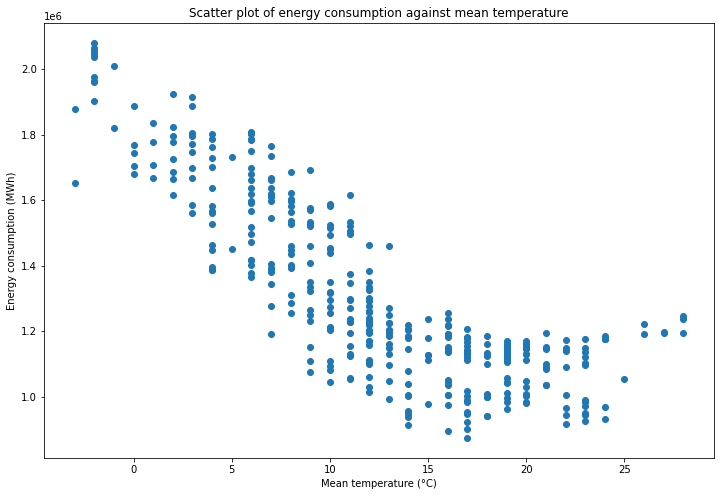

In [25]:
#Visiualizing the relationship between the average temperature and energy consumption
plt.figure(figsize = (12, 8))
plt.scatter(france.avg_temp, france.daily_energy)
plt.xlabel("Mean temperature (°C)")
plt.ylabel("Energy consumption (MWh)")
plt.title("Scatter plot of energy consumption against mean temperature")
plt.show()

### Question 5

In [26]:
X = france['avg_temp']
y = france.daily_energy
fit = np.polyfit(X, y, 2)

In [27]:
#coeficients
a = fit[0]
b = fit[1]
c = fit[2]
eqn = a*np.square(X) + b*X + c

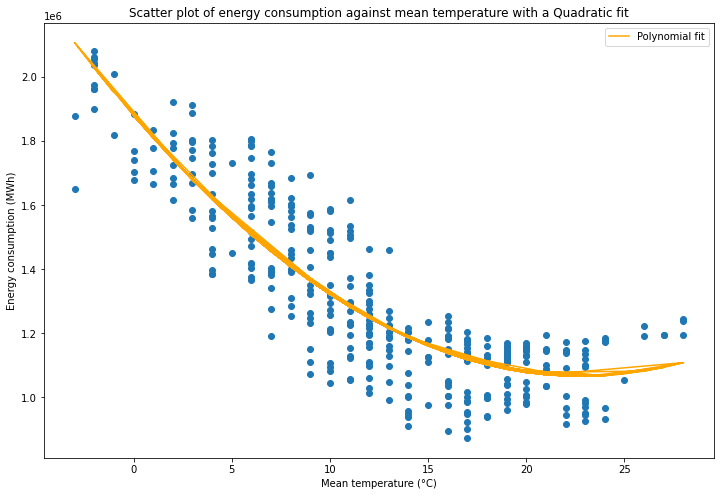

In [28]:
plt.figure(figsize = (12, 8))
plt.scatter(france.avg_temp, france.daily_energy)
plt.plot(X, eqn, color = 'orange', label = 'Polynomial fit')
plt.xlabel("Mean temperature (°C)")
plt.ylabel("Energy consumption (MWh)")
plt.title("Scatter plot of energy consumption against mean temperature with a Quadratic fit")
plt.legend()
plt.show()

In [29]:
a, b, c

(1567.4638778658214, -71406.89532583382, 1879113.5563244938)

### Question 6

In [30]:
min_x = -b/(2*a) # by differentiating the fit equation and setting it to zero
y_value =  a*min_x**2 + b*min_x + c
print("Temperature at minimum consumption: " + str(min_x) + "°C" + ", Minimum Energy Consumption: " + str(y_value) + "MWh")

Temperature at minimum consumption: 22.777843985488772°C, Minimum Energy Consumption: 1065865.995714509MWh


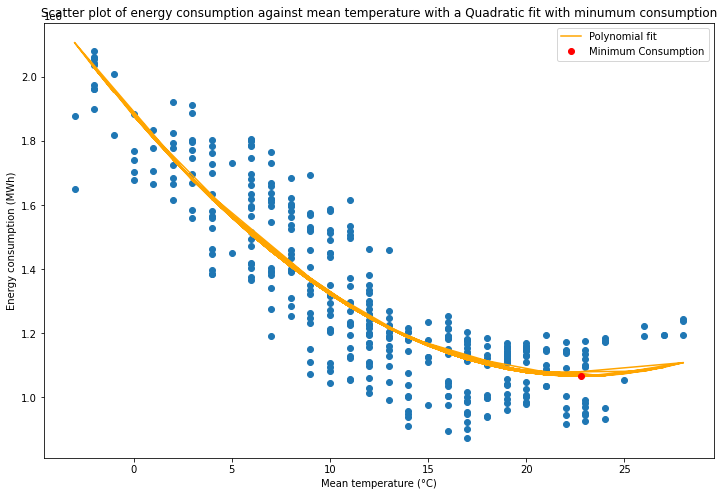

In [31]:
plt.figure(figsize = (12, 8))
plt.scatter(france.avg_temp, france.daily_energy)
plt.plot(X, eqn, color = 'orange', label = 'Polynomial fit')
plt.plot(min_x, y_value, 'ro', label = 'Minimum Consumption')
plt.xlabel("Mean temperature (°C)")
plt.ylabel("Energy consumption (MWh)")
plt.title("Scatter plot of energy consumption against mean temperature with a Quadratic fit with minumum consumption")
plt.legend()
plt.show()

### Question 7

In [32]:
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    bic = {}
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            bic[model.bic] = included+[new_column]
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included, bic

In [33]:
y = france.daily_energy
X = france[['high_temp', 'avg_temp', 'low_temp', 'high_dew_point', 'avg_dew_point', 'low_dew_point', 'high_humidity', 
           'avg_humidity', 'low_humidity', 'high_sea_level', 'avg_sea_level', 'low_sea_level', 'high_visibility',
           'avg_visibility', 'low_visibility', 'high_wind', 'avg_wind', 'sum_precip']]

In [34]:
a, b = forward_regression(X, y, 0.05, verbose = True)

<ipython-input-32-ad35c9c2b1e6>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  high_temp                      with p-value 1.82151e-93
Add  high_visibility                with p-value 9.72513e-08
Add  high_humidity                  with p-value 0.000846698
Add  avg_temp                       with p-value 0.014433
Add  low_humidity                   with p-value 7.79481e-06
Add  avg_dew_point                  with p-value 0.00204418
Add  low_sea_level                  with p-value 0.00718581


In [35]:
Lr = LinearRegression()

In [36]:
y_reg = france.daily_energy.values.reshape(-1, 1)
X_reg = france[["high_temp", "high_visibility", "high_humidity", "avg_temp", "low_humidity", "avg_dew_point", "low_sea_level"]]

In [37]:
Lr.fit(X_reg, y_reg)

LinearRegression()

In [38]:
y_pred = Lr.predict(X_reg)

In [39]:
print("R-Squared value: " + str(r2_score(y_reg, y_pred, multioutput='variance_weighted')))

R-Squared value: 0.7506437341112865


In [40]:
france.drop(columns = ["data_type"], inplace = True)

### Question 8

In [41]:
# Creating extra columns by squaring every column
for x in france.columns:
    france[x + "_sqr"] = france[x]**2

In [42]:
france.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   daily_energy         365 non-null    float64
 1   high_temp            365 non-null    int64  
 2   avg_temp             365 non-null    int64  
 3   low_temp             365 non-null    int64  
 4   high_dew_point       365 non-null    int64  
 5   avg_dew_point        365 non-null    int64  
 6   low_dew_point        365 non-null    int64  
 7   high_humidity        365 non-null    int64  
 8   avg_humidity         365 non-null    int64  
 9   low_humidity         365 non-null    int64  
 10  high_sea_level       365 non-null    int64  
 11  avg_sea_level        365 non-null    int64  
 12  low_sea_level        365 non-null    int64  
 13  high_visibility      365 non-null    float64
 14  avg_visibility       365 non-null    float64
 15  low_visibility       

In [43]:
france.drop(columns = ("daily_energy_sqr"), inplace = True)

In [44]:
y_sqr = france.daily_energy.values.reshape(-1, 1)
X_sqr = france[france.columns].drop(columns = ('daily_energy'))

In [45]:
a, b = forward_regression(X_sqr, y_sqr, 0.05, verbose = True)

Add  high_temp                      with p-value 1.82151e-93


<ipython-input-32-ad35c9c2b1e6>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  high_temp_sqr                  with p-value 1.18332e-36
Add  high_visibility_sqr            with p-value 0.0300572
Add  high_visibility                with p-value 0.00131632


In [46]:
Lr_sqr = LinearRegression()
X_new = france[["high_temp", "high_temp_sqr", "high_visibility_sqr", "high_visibility"]]
y_new = y_sqr
Lr_sqr.fit(X_new, y_new)
y_pred_new = Lr_sqr.predict(X_new)
print("R-Squared value: " + str(r2_score(y_new, y_pred_new, multioutput='variance_weighted')))

R-Squared value: 0.8068265031072408


### Question 9

In [47]:
france['week_day'] = france.index.weekday

In [48]:
france.week_day.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [49]:
france["week_day"].replace({0:"Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}, inplace = True) 

In [50]:
france = pd.get_dummies(france)

In [51]:
y_with_days = france.daily_energy.values.reshape(-1, 1)
X_with_days = france[france.columns].drop(columns = ('daily_energy'))

In [52]:
a, b = forward_regression(X_with_days, y_with_days, 0.05, verbose = True)

<ipython-input-32-ad35c9c2b1e6>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  high_temp                      with p-value 1.82151e-93
Add  high_temp_sqr                  with p-value 1.18332e-36
Add  week_day_Sun                   with p-value 2.02543e-18
Add  week_day_Sat                   with p-value 1.51634e-18
Add  avg_temp                       with p-value 2.22261e-05
Add  low_humidity                   with p-value 2.29513e-06
Add  high_wind_sqr                  with p-value 0.000399405
Add  week_day_Mon                   with p-value 0.00398247
Add  sum_precip                     with p-value 0.0117157
Add  avg_temp_sqr                   with p-value 0.026503
Add  high_dew_point_sqr             with p-value 0.016792


In [53]:
print("Days selected are: Sunday, Saturday and Monday")

Days selected are: Sunday, Saturday and Monday


In [54]:
Lr_with_days = LinearRegression()
X_plus_days = france[list(a)]
y_plus_days = y_with_days
Lr_with_days.fit(X_plus_days, y_plus_days)
y_pred_days = Lr_with_days.predict(X_plus_days)
print("R-Squared value: " + str(r2_score(y_plus_days, y_pred_days, multioutput='variance_weighted')))

R-Squared value: 0.8945057843312311


### Question 10

#### Cross-Validation

In [55]:
lr = LinearRegression()

# create a KFold object with 5 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(lr, X_plus_days, y_plus_days, scoring='r2', cv=folds)
np.mean(scores)

0.8768377174917813

#### Regularization: Lasso

In [56]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scaler = StandardScaler()
X_plus_days = scaler.fit_transform(X_plus_days)
model = LassoCV(alphas=np.arange(0, 1, 0.001), cv=cv, n_jobs=-1)
model.fit(X_plus_days, y_plus_days)
score = model.score(X_plus_days, y_plus_days)

C:\Users\Courage Ekoh\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Courage Ekoh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1036221260599.2351, tolerance: 2565048204.9809976
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Courage Ekoh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 597706873837.1016, tolerance: 2547341943.6631827
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Courage Ekoh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: O

C:\Users\Courage Ekoh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Courage Ekoh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1297512976707.8633, tolerance: 2450386844.1945567
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Courage Ekoh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Courage Ekoh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\Courage Ekoh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Courage Ekoh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1410438155938.9375, tolerance: 2571108442.18419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Courage Ekoh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Courage Ekoh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

In [58]:
score

0.8945057827041751

### Extra Code for future use

In [59]:
def missingdata(data):
    import seaborn as sns
    import matplotlib.pyplot as plt
    if data.isnull().sum().sum() > 0:
        total = data.isnull().sum().sort_values(ascending = False)
        percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
        ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        ms= ms[ms["Percent"] > 0]
        f,ax =plt.subplots(figsize=(8,6))
        plt.xticks(rotation='90')
        fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15)
        return ms
    else:
        print(data.isnull().sum())